c:\Users\John\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\John\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


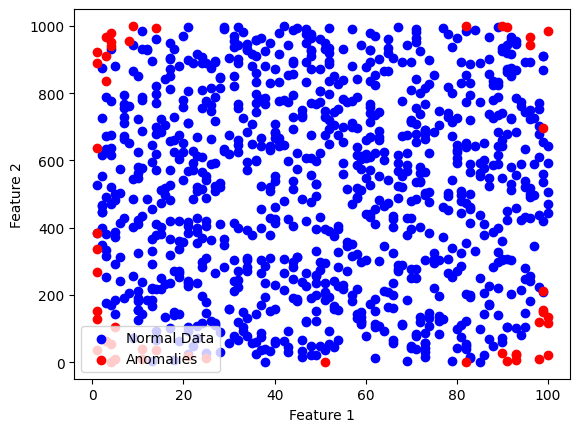

In [10]:
# Import libraries
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest

# Load the json collection as a list of dictionaries
with open("C:/Users/John/Downloads/mock_orders.json", "r") as f:
    data = json.load(f)

from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Initialize lists to store features and categories
features = []
categories = []
statuses = []

# Iterate through the JSON data
for item in data:
    # Extract numerical features
    feature1 = item["quantity"]
    feature2 = item["unit_price"]
    features.append([feature1, feature2])

    # Extract and preprocess the categorical feature (category)
    category = item["order_status"]
    categories.append(category)

    # Extract and preprocess the categorical feature (category)
    order_status = item["order_status"]
    statuses.append(order_status)

# Use one-hot encoding for the categorical variable (category)
encoder = OneHotEncoder(sparse=False)
categories_encoded = encoder.fit_transform(np.array(categories).reshape(-1, 1))
statuses_encoded = encoder.fit_transform(np.array(categories).reshape(-1, 1))

# Combine numerical and encoded categorical features
feature_vectors = np.hstack((np.array(features), categories_encoded, statuses_encoded))

from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
clf = IsolationForest(contamination=0.05)  # Adjust the contamination parameter

# Fit the model to your data
clf.fit(feature_vectors)

# Predict anomalies (outliers)
anomalies = clf.predict(feature_vectors)


import matplotlib.pyplot as plt

# Extract the x and y coordinates from your feature vectors
x = feature_vectors[:, 0]  # Replace with the actual feature indices
y = feature_vectors[:, 1]

# Plot normal data points in blue
plt.scatter(x[anomalies == 1], y[anomalies == 1], c='b', label='Normal Data')

# Plot anomalies in red
plt.scatter(x[anomalies == -1], y[anomalies == -1], c='r', label='Anomalies')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
